In [71]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [72]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

In [73]:
file_path =r'C:\Users\himan\OneDrive\Desktop\Documents\realistic_obesity_data_50000.csv'
df = pd.read_csv(file_path)
df.head()

,Age,Gender,Height_cm,Weight_kg,BMI,Obesity_Status,Physical_Activity_Level,Diet_Type,Smoking_Habits,Alcohol_Consumption,Family_History_Obesity,Blood_Pressure,Cholesterol_Levels,Education_Level,Income_Level,Geographical_Region
0,56,0,168.131011,42.559878,15.055831,Underweight,3,1,0,0,0,Hypertension Stage 1,1,1,1,2
1,18,1,198.592722,110.917488,28.123759,Overweight,4,1,2,0,1,Elevated,2,3,2,1
2,43,0,165.658984,67.969225,24.767509,Normal weight,2,0,1,0,1,Hypertension Stage 2,2,2,3,2
3,43,1,154.234595,65.456750,27.516351,Overweight,3,1,0,0,0,Hypertension Stage 2,2,2,2,3
4,35,0,168.723152,60.870800,21.382557,Normal weight,1,0,0,1,1,Hypertension Stage 1,1,3,2,1


In [74]:
df.shape

(50000, 16)

In [75]:
df.isnull().sum()

Age                        0
Gender                     0
Height_cm                  0
Weight_kg                  0
BMI                        0
Obesity_Status             0
Physical_Activity_Level    0
Diet_Type                  0
Smoking_Habits             0
Alcohol_Consumption        0
Family_History_Obesity     0
Blood_Pressure             0
Cholesterol_Levels         0
Education_Level            0
Income_Level               0
Geographical_Region        0
dtype: int64

In [76]:
label_encoder = LabelEncoder()
df['Obesity_Status'] = label_encoder.fit_transform(df['Obesity_Status'])
df['Blood_Pressure'] = label_encoder.fit_transform(df['Blood_Pressure'])

In [77]:
X = df.drop(['Obesity_Status','BMI'], axis=1)
y = df['Obesity_Status']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

### Xg boosting

In [78]:
model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y.unique()))
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=4,
              num_parallel_tree=None, ...)

In [79]:
y_pred = model.predict(x_test)

In [80]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

train_pred = model.predict(x_train)
train_accuracy = accuracy_score(y_train, train_pred)

test_pred = model.predict(x_test)
test_accuracy = accuracy_score(y_test, test_pred)

In [81]:
print(f"Accuracy: {accuracy * 100:.2f}%")
print()
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print()
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Accuracy: 98.82%

Training Accuracy: 100.00%

Test Accuracy: 98.82%


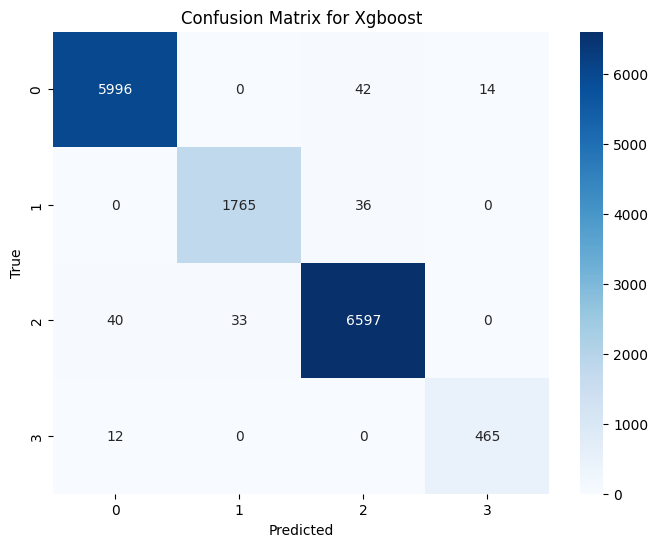

In [82]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Xgboost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Random forest

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [85]:
y_pred = rf_model.predict(x_test)

In [86]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}')
conf_matrix = confusion_matrix(y_test, y_pred)

Accuracy: 92.57


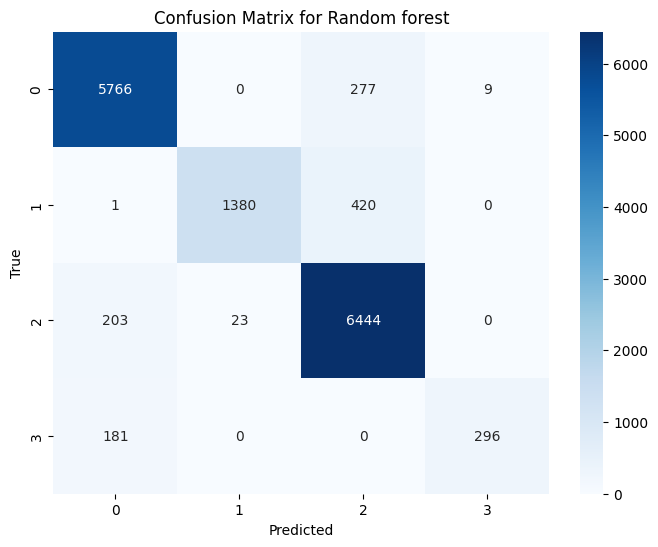

In [87]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Decision tree

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [90]:
y_pred = decision_tree_model.predict(x_test)

In [91]:
accuracy = accuracy_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

train_pred = decision_tree_model.predict(x_train)
train_accuracy = accuracy_score(y_train, train_pred)

test_pred = decision_tree_model.predict(x_test)
test_accuracy = accuracy_score(y_test, test_pred)

In [92]:
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print()
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print()
print(f"Accuracy: {accuracy * 100:.2f}%")

Training Accuracy: 100.00%

Test Accuracy: 98.61%

Accuracy: 98.61%


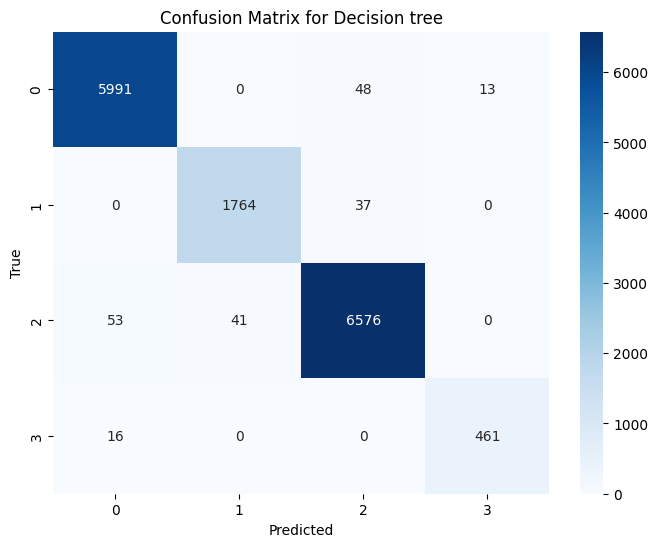

In [93]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Decision tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()